In [1]:
%run startup.py

In [2]:
from Core.neural_network import NeuralNetwork
from Utils.data_setup import get_data
from Utils.data_preprocessing import to_one_hot, preprocess_images

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [3]:
x_train, y_train = get_data('train')

x_train_normalized = preprocess_images(images=x_train, flatten=True)
y_train_one_hot = to_one_hot(y=y_train, num_classes=10)

x_train_normalized.shape, y_train_one_hot.shape

((60000, 784), (60000, 10))

In [4]:
x_test, y_test = get_data('test')

x_test_normalized = preprocess_images(images=x_test, flatten=True)
y_test_one_hot = to_one_hot(y=y_test, num_classes=10)

x_test_normalized.shape, y_test_one_hot.shape

((10000, 784), (10000, 10))

In [5]:
y_test_indexes = np.argmax(y_test_one_hot, axis=1)

y_test_indexes

array([7, 2, 1, ..., 4, 5, 6])

In [6]:
network = NeuralNetwork()

history = network.fit(
    inputs=x_train_normalized,
    targets=y_train_one_hot,
    epochs=500,
    batch_size=128,
    learning_rate= 0.001,
    patience=20,
    min_improvement=0.001,
    verbose=True
)

Epoch 1/500 - loss: 0.3228 - accuracy: 0.9054
Epoch 2/500 - loss: 0.1118 - accuracy: 0.9659
Epoch 3/500 - loss: 0.0699 - accuracy: 0.9783
Epoch 4/500 - loss: 0.0497 - accuracy: 0.9835
Epoch 5/500 - loss: 0.0361 - accuracy: 0.9884
Epoch 6/500 - loss: 0.0289 - accuracy: 0.9905
Epoch 7/500 - loss: 0.0228 - accuracy: 0.9923
Epoch 8/500 - loss: 0.0198 - accuracy: 0.9933
Epoch 9/500 - loss: 0.0152 - accuracy: 0.9950
Epoch 10/500 - loss: 0.0152 - accuracy: 0.9949
Epoch 11/500 - loss: 0.0126 - accuracy: 0.9957
Epoch 12/500 - loss: 0.0116 - accuracy: 0.9962
Epoch 13/500 - loss: 0.0140 - accuracy: 0.9954
Epoch 14/500 - loss: 0.0106 - accuracy: 0.9965
Epoch 15/500 - loss: 0.0108 - accuracy: 0.9963
Epoch 16/500 - loss: 0.0129 - accuracy: 0.9960
Epoch 17/500 - loss: 0.0070 - accuracy: 0.9977
Epoch 18/500 - loss: 0.0079 - accuracy: 0.9974
Epoch 19/500 - loss: 0.0081 - accuracy: 0.9975
Epoch 20/500 - loss: 0.0080 - accuracy: 0.9974
Epoch 21/500 - loss: 0.0056 - accuracy: 0.9982
Epoch 22/500 - loss: 0

In [7]:
predicts = network.predict(x_test_normalized)

acc = accuracy_score(y_test_indexes, predicts)
print(f'Accuracy at test: {acc:.8f}')

Accuracy at test: 0.98230000


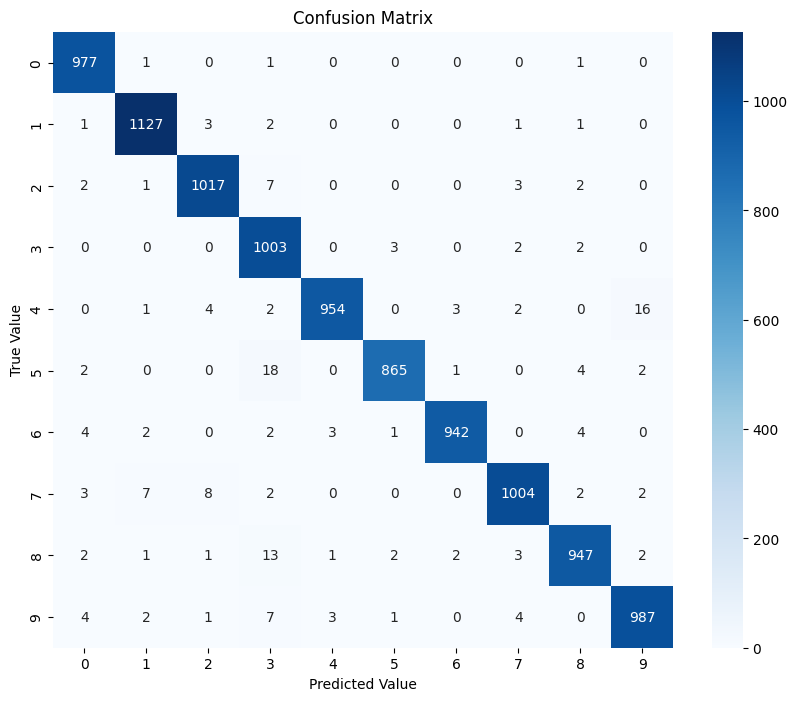

In [8]:
plt.figure(figsize=(10,8))
cm = confusion_matrix(y_test_indexes, predicts)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()

In [9]:
print('Classification Report')
print(classification_report(y_test_indexes, predicts))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



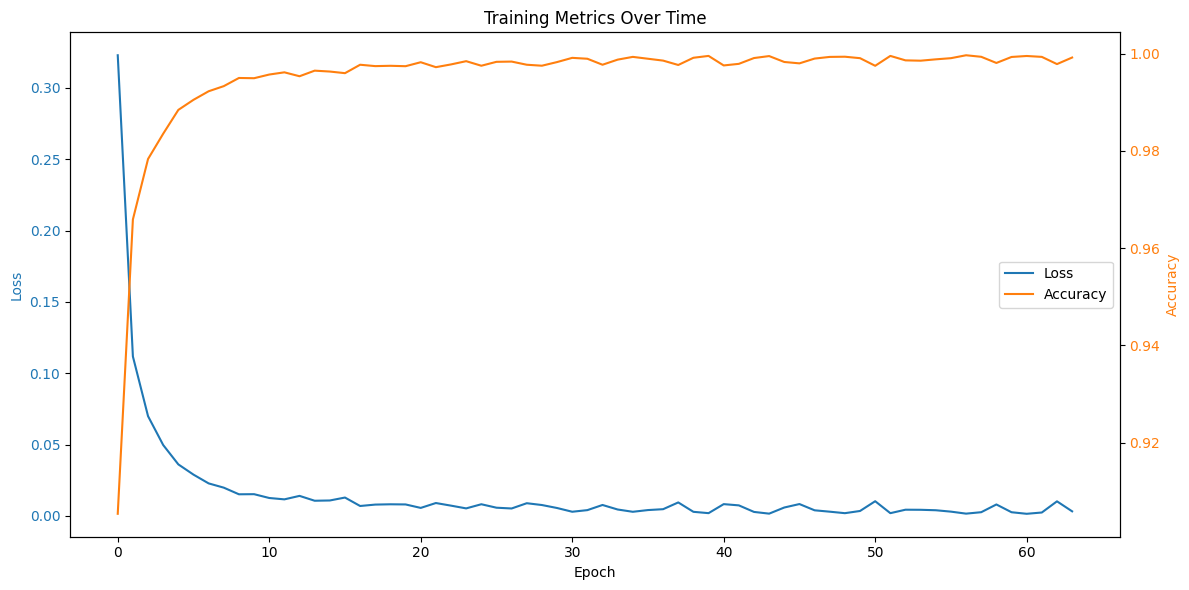

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color=color1)
line1 = ax1.plot(history['loss'], color=color1, label='Loss')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Accuracy', color=color2)
line2 = ax2.plot(history['accuracy'], color=color2, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Training Metrics Over Time')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='center right')

plt.tight_layout()
plt.show()

In [12]:
network.save_model("../Models/neural_network_1.json")